## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - There are several missing values in the Age column. Majority of the values in the cabin column are missing.
 - We can replace the missing values in the age column by mean/median/mode.
 - We should drop the cabin column.
 - There are two rows with missing values in the Embarked column.
 - Sex and Embarked columns can be converted into categorical data type.

In [6]:
#Replacing the missing age values by the median.
median = int(train.Age.median())

In [7]:
train['Age'] = train.Age.fillna(int(median))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Dropping the cabin column:
train.drop('Cabin',axis=1,inplace=True)

In [10]:
list(train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [11]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
#Since most of the passengers had port of embarkation as S, replacing the missing values by 'S'
train['Embarked']=train.Embarked.fillna('S')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


 - The age and Cabin columns in the test dataset have several missing values.
 - One entry in the test dataset has a empty value in the fare column.
 

In [15]:
#Replacing missing values by median
median = int(test.Age.median())
test['Age'] = test.Age.fillna(int(median))

In [16]:
#Dropping the cabin column
test.drop('Cabin',axis=1,inplace=True)

In [17]:
#Checking for duplicates
print(sum(train.duplicated()))
print(sum(train.duplicated()))

0
0


In [18]:
#Replacing missing value in the fare column by median
median = test.Fare.median()
test['Fare'] = test.Fare.fillna(median)

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## EDA

### In the following section we will perform Exploratory data analysis on the datasets to select the features for our predictive analysis model.

In [20]:
#%age of people in different classes
(train.Pclass.value_counts()/891)*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

 - 55.10% passengers were in the 3rd class category
 - 20.65% passengers were in the 2nd class category
 - 24.01% passengers were in the 1st class category

In [21]:
# Grouping the passengers by their class and getting their survival rate
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### Thus, the class of the passenger seems to have a good influence on the survival of the passenger.

In [22]:
# Grouping the passengers by their port of embarkation and getting their survival rate
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

 - 55% of the passengers who embarked at Cherbourg survived.
 - The port of embarkation of the passenger is a crucial factor to determine whether the passenger survived or not, so we will include it in our model.

In [23]:
# Grouping the passengers by their gender and getting their survival rate
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

 - 74% of the women that were onboard survived.
 - Only 18% of the men onboard survived.
 - Gender is a very important factor to determine the survival of a passenger, we can observe that a female passenger has a greater chance of survival as compared to a male and thus we will include it in our model.

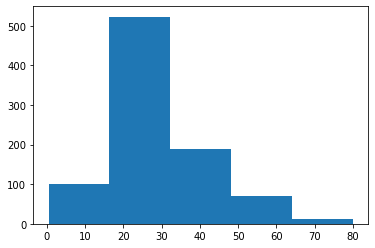

In [24]:
#Observing the distribution of ages of the passengers on board.
plt.hist(train['Age'],bins = 5);

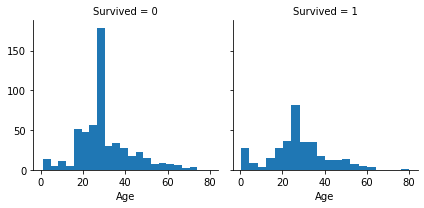

In [25]:
#Visualizing the survival rate of the passengers grouped together by their respective age.
g = sns.FacetGrid(data = train,col = 'Survived')
g.map(plt.hist,'Age', bins=20);

 - There are very few passengrs aged 60 or more.
 - Majority of passengers are between ages 18 and 30.
 - Very few kids(<20) and senior citizens(>60) did not survive the voyage.
 - Majority of the passengers belonging to the age range 18-30 did not survive the voyage.
 - Age is a deciding factor in the survival of a passeneger,we can observe that a passenger between the ages 18-30 has a less chance of surviving as compared to other passengers and thus it should be a part of our model.

In [26]:
# Let us divide the age of the passengers into different categories(denoted by integers)
train.loc[ train['Age'] <= 16, 'Age']  = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age']                         = 4

In [27]:
train.Age.value_counts()

1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
Name: Age, dtype: int64

### Key for ages:
__Less than 16.__ = __0__ 

__Between 16 and 32__ = __1__ 

__Between 32 and 48__ = __2__ 

__Between 48 and 64__ = __3__ 

__Greater than 64.__ = __4__

### Doing the same for the test set

In [28]:
test.loc[ test['Age'] <= 16, 'Age']  = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age']                         = 4

In [29]:
test.Age.value_counts()

1.0    264
2.0     81
3.0     37
0.0     34
4.0      2
Name: Age, dtype: int64

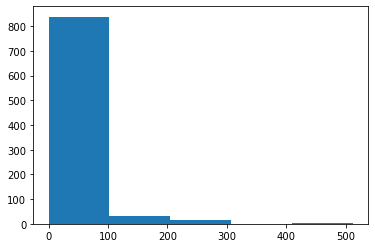

In [30]:
# Observing the distribution of fares paid by the passengers
plt.hist(train['Fare'],bins = 5);

In [31]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
#Dividing the fare into categories denoted by integers
train.loc[ train['Fare'] <= 7.91, 'Fare']        = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare']         = 3
train['Fare'] = train['Fare'].astype(int)

In [33]:
train.Fare.value_counts()

2    229
0    223
3    222
1    217
Name: Fare, dtype: int64

In [34]:
train.groupby('Fare')['Survived'].mean()

Fare
0    0.197309
1    0.308756
2    0.445415
3    0.581081
Name: Survived, dtype: float64

### The above statisitcs show that as the fare paid by the passenger increases, the chances of survival goes up.

### Doing the same for the test set

In [35]:
test.loc[ test['Fare'] <= 7.91, 'Fare']        = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare']         = 3
test['Fare'] = test['Fare'].astype(int)

In [36]:
test.Fare.value_counts()

0    114
3    108
2    103
1     93
Name: Fare, dtype: int64

In [37]:
#Combining the SibSp and Parch to get a single variable Family:
train['Family'] = train['Parch'] + train['SibSp']

In [38]:
train['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [39]:
# Creating a new column IsAlone
train.loc[train['Family'] == 0, 'IsAlone'] = int(1)
train.loc[train['Family'] > 0, 'IsAlone'] = int(0)


In [40]:
train.IsAlone.value_counts()

1.0    537
0.0    354
Name: IsAlone, dtype: int64

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int32  
 10  Embarked     891 non-null    object 
 11  Family       891 non-null    int64  
 12  IsAlone      891 non-null    float64
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 87.1+ KB


In [42]:
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0.0,0.505650
1,1.0,0.303538


#### Thus, 30% of the passengers who travelled alone survived, where as 50.5% of the passengers who travelled with their families survived.

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3,C,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1,S,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3,S,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1,S,0,1.0


### Doing the same for the test set


In [44]:
#Combining the SibSp and Parch to get a single variable Family:
test['Family'] = test['Parch'] + test['SibSp']

In [45]:
test['Family'].value_counts()

0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: Family, dtype: int64

In [46]:
# Creating a new column IsAlone
test.loc[test['Family'] == 0, 'IsAlone'] = int(1)
test.loc[test['Family'] > 0, 'IsAlone'] = int(0)

In [47]:
test.IsAlone.value_counts()

1.0    253
0.0    165
Name: IsAlone, dtype: int64

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    int32  
 9   Embarked     418 non-null    object 
 10  Family       418 non-null    int64  
 11  IsAlone      418 non-null    float64
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 37.7+ KB


In [49]:
#Extracting the title of the passenger from their name
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [50]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Sir           1
Don           1
Lady          1
Jonkheer      1
Countess      1
Capt          1
Name: Title, dtype: int64

### There seem to be several outlier titles in the dataset, lets replace these outliers by the rare title.

In [51]:
train['Title'] = train['Title'].replace(['Dr','Rev','Mile','Major','Col','Jonkheer','Sir','Capt','Countess','Lady','Don','Mlle'],'Rare')

In [52]:
#For simplicity, lets replace Ms by miss
train['Title'] = train['Title'].replace('Ms','Miss')
train['Title'] = train['Title'].replace('Mme','Mrs')

In [53]:
train['Title'].value_counts()

Mr        517
Miss      183
Mrs       126
Master     40
Rare       25
Name: Title, dtype: int64

In [54]:
train.groupby(['Title'])['Survived'].mean()

Title
Master    0.575000
Miss      0.699454
Mr        0.156673
Mrs       0.793651
Rare      0.400000
Name: Survived, dtype: float64

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int32  
 10  Embarked     891 non-null    object 
 11  Family       891 non-null    int64  
 12  IsAlone      891 non-null    float64
 13  Title        891 non-null    object 
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 94.1+ KB


In [56]:
#Mapping the titles to integers
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)

In [57]:
train.Title.value_counts()

1    517
2    183
3    126
4     40
5     25
Name: Title, dtype: int64

### Doing the same for the test set


In [58]:
#Extracting the title of the passenger from their name
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [59]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [60]:
test['Title'] = test['Title'].replace(['Dr','Rev','Mile','Major','Col','Jonkheer','Sir','Capt','Countess','Lady','Don','Mlle'],'Rare')

In [61]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rare        5
Ms          1
Dona        1
Name: Title, dtype: int64

In [62]:
test['Title'] = test['Title'].replace('Dona','Rare')

In [63]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rare        6
Ms          1
Name: Title, dtype: int64

In [64]:
#For simplicity, lets replace Ms by miss
test['Title'] = test['Title'].replace('Ms','Miss')

In [65]:
test['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [66]:
#Mapping the titles to integers
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
test['Title'] = test['Title'].map(title_mapping)

In [67]:
test['Title'].value_counts()

1    240
2     79
3     72
4     21
5      6
Name: Title, dtype: int64

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0,S,1,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3,C,1,0.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1,S,0,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3,S,1,0.0,3
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1,S,0,1.0,1


In [69]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone,Title
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,0,Q,0,1.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.0,1,0,363272,0,S,1,0.0,3
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,1,Q,0,1.0,1
3,895,3,"Wirz, Mr. Albert",male,1.0,0,0,315154,1,S,0,1.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,1,S,2,0.0,3


In [70]:
#Mapping the gender of the passengers to integers
gender_mapping = {"female" : 0, "male" : 1}
train['Sex'] = train['Sex'].map(gender_mapping)
test['Sex'] = test['Sex'].map(gender_mapping)

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0,S,1,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,3,C,1,0.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,1,S,0,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,3,S,1,0.0,3
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,1,S,0,1.0,1


In [72]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone,Title
0,892,3,"Kelly, Mr. James",1,2.0,0,0,330911,0,Q,0,1.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,363272,0,S,1,0.0,3
2,894,2,"Myles, Mr. Thomas Francis",1,3.0,0,0,240276,1,Q,0,1.0,1
3,895,3,"Wirz, Mr. Albert",1,1.0,0,0,315154,1,S,0,1.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1.0,1,1,3101298,1,S,2,0.0,3


In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0,S,1,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,3,C,1,0.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,1,S,0,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,3,S,1,0.0,3
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,1,S,0,1.0,1


In [74]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone,Title
0,892,3,"Kelly, Mr. James",1,2.0,0,0,330911,0,Q,0,1.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,363272,0,S,1,0.0,3
2,894,2,"Myles, Mr. Thomas Francis",1,3.0,0,0,240276,1,Q,0,1.0,1
3,895,3,"Wirz, Mr. Albert",1,1.0,0,0,315154,1,S,0,1.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1.0,1,1,3101298,1,S,2,0.0,3


In [75]:
#MApping the port of Embarkation to integers
port_mapping = {"C":0,"S":1,"Q":2}
train['Embarked'] = train['Embarked'].map(port_mapping)
test['Embarked'] = test['Embarked'].map(port_mapping)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0,1,1,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,3,0,1,0.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,1,1,0,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,3,1,1,0.0,3
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,1,1,0,1.0,1


In [77]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone,Title
0,892,3,"Kelly, Mr. James",1,2.0,0,0,330911,0,2,0,1.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,363272,0,1,1,0.0,3
2,894,2,"Myles, Mr. Thomas Francis",1,3.0,0,0,240276,1,2,0,1.0,1
3,895,3,"Wirz, Mr. Albert",1,1.0,0,0,315154,1,1,0,1.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1.0,1,1,3101298,1,1,2,0.0,3


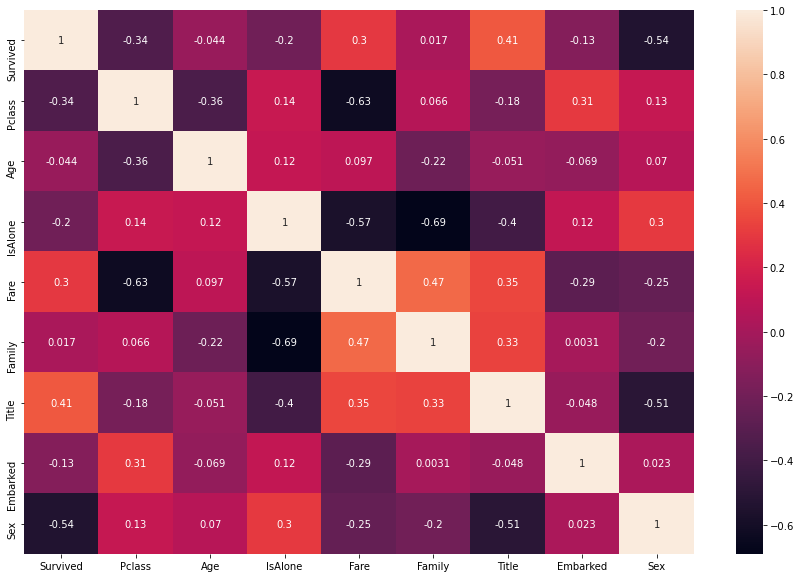

In [78]:
#Creating heatmap to filter out features for predictive analysis
import seaborn as sns
plt.subplots(figsize = (15,10))
corr = train[['Survived','Pclass','Age','IsAlone','Fare','Family','Title','Embarked','Sex']].corr()
sns.heatmap(corr,annot = True);

#### Initially lets include all the features having correlation coefficient greater than 0.1(magnitude) ie: Sex, Embarked, Title, Fare,IsAlone, Pclass.

## Predictive Analysis

In [79]:
test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone,Title
112,1004,1,"Evans, Miss. Edith Corse",0,2.0,0,0,PC 17531,3,0,0,1.0,2


In [80]:
test_1 = test.copy()

In [81]:
test_1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone,Title
0,892,3,"Kelly, Mr. James",1,2.0,0,0,330911,0,2,0,1.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,363272,0,1,1,0.0,3
2,894,2,"Myles, Mr. Thomas Francis",1,3.0,0,0,240276,1,2,0,1.0,1
3,895,3,"Wirz, Mr. Albert",1,1.0,0,0,315154,1,1,0,1.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1.0,1,1,3101298,1,1,2,0.0,3


In [82]:
#Removing unnecessary features
train = train[['Pclass','Sex','Fare','Embarked','IsAlone','Title','Survived']]
test = test[['Pclass','Sex','Fare','Embarked','IsAlone','Title']]

In [83]:
#Exporting the train df 
train.to_csv('train_2.csv')

## Applying several classification ML models to predict the survival of the passengers on board.
### Including all features
 - Decision tree classification: __81.32__ 
 - K nearest neighbours : __81.69__
 - Logistic Regression: __80.55__
 - Naive Bayes: __78.49__
 - Support Vector Machine: __78.66__
 - Random Forest classification: __81.1__
 - XGBoost classifier: __83.59__
 - Kernal SVM:
 
 ### Including features with correlation coefficient greater than 0.1 in magnitude:
 - Decision tree classification: __80.4__ 
 - K nearest neighbours : __81.7__
 - Logistic Regression: __79.86__
 - Naive Bayes: __78.15__
 - Support Vector Machine: __78.9__
 - Random Forest classification: __80.24__
 - XGBoost classifier: __83.10__
 - Kernal SVM: __82.74__
 
 ###### All the above results have been obtained after applying k fold cross validation.

## From above, we will select the XGBoost classifier on our model.

In [84]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training XGBoost on the Training set

In [86]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

## Making the Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[120  19]
 [ 25  59]]


0.8026905829596412

## Applying k-Fold Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.10 %
Standard Deviation: 2.78 %


### Applying the trained XGBoost model on our test dataset

In [89]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
test_pred = classifier.predict(test.values)

In [90]:
print(test_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [91]:
Submission = pd.DataFrame([test_1['PassengerId'],test_pred])

In [92]:
Submission.head()

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
PassengerId,892,893,894,895,896,897,898,899,900,901,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309
Unnamed 0,0,1,0,0,1,0,1,0,1,0,...,1,1,1,1,1,0,1,0,0,1


In [93]:
Submission.to_csv('Submission_1.csv')